### Imports

In [7]:
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tabulate import tabulate

import importlib
import utils.eval_helpers_intra as eval_helpers_intra
import utils.config as config

importlib.reload(config)
importlib.reload(eval_helpers_intra)

from utils.eval_helpers_intra import *
from utils.config import *


### Load data

In [2]:
from pathlib import Path

# --- Config ---
ROOT_PATH   = Path.cwd()
RESULTS_SRC = "results"   # or "results or results_temp (if you ran the pipeline and saved)"


# --- Paths ---
root_voxels     = ROOT_PATH / RESULTS_SRC / "1.Orthographic_Voxel_Carving"
deformed_voxels = ROOT_PATH / RESULTS_SRC / "3.Part-wise_3D_Refinement"
cam_dir         = ROOT_PATH / RESULTS_SRC / "2.Perspective_Camera_Estimation"
root_masks      = ROOT_PATH / "data"

# --- Sanity checks ---
for p in [root_voxels, deformed_voxels, cam_dir, root_masks]:
    assert p.exists(), f"Missing path: {p}"


### Minaret keypoints reprojection


🏛️ Taj
Mask resized: (660,1214) → (278,512) | scale=0.422


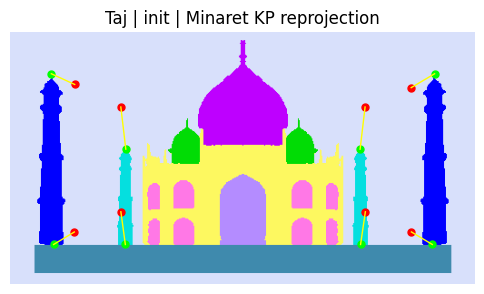

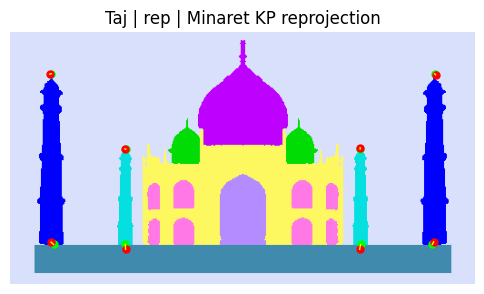


🏛️ Bibi
Mask resized: (861,1386) → (318,512) | scale=0.369


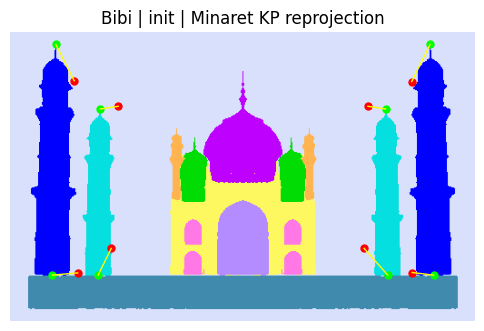

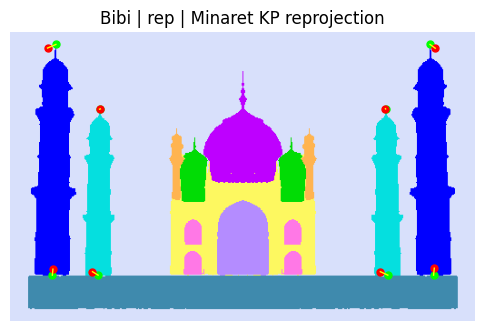


🏛️ Itimad
Mask resized: (1491,2374) → (322,512) | scale=0.216


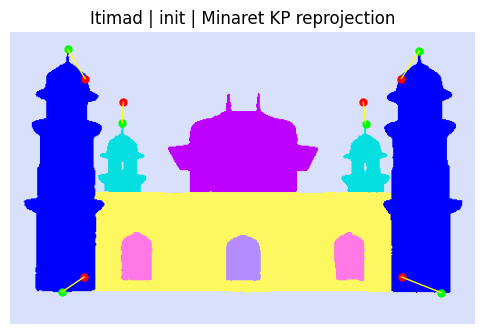

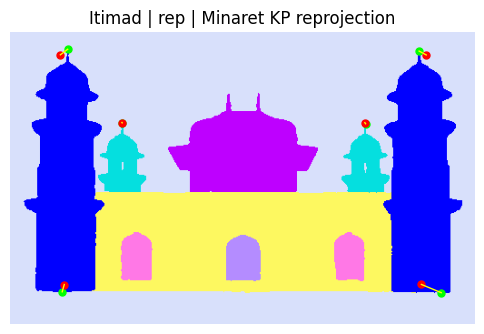


🏛️ Akbar
Mask resized: (693,718) → (124,128) | scale=0.178


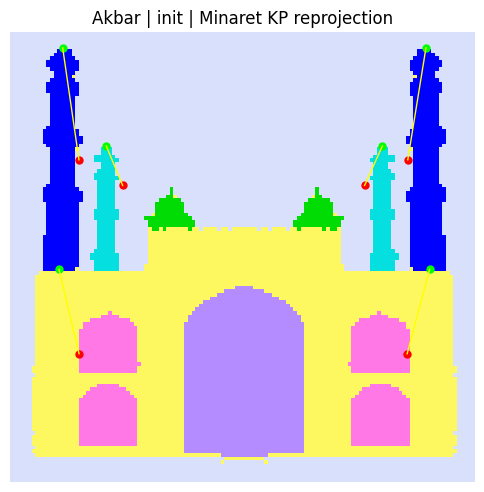

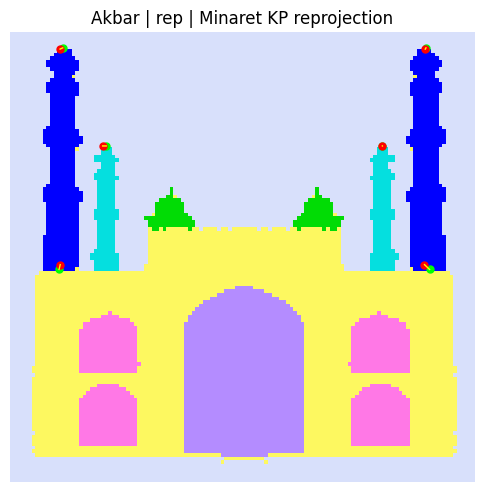


🏛️ Charminar
Mask resized: (1446,1004) → (512,355) | scale=0.354


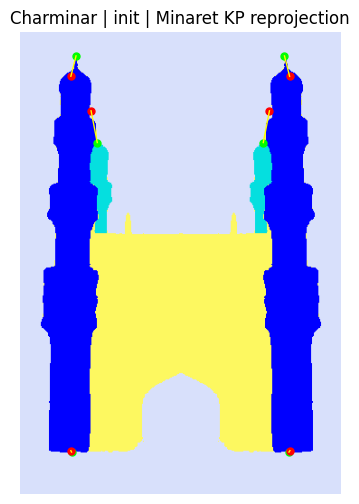

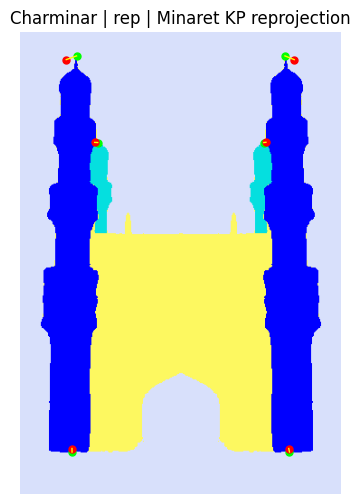


=== Minaret Keypoint Reprojection Error (px) ===
Θinit → Θkp

Rules:
- LM1, RM1: top + bottom
- LM2, RM2:
    * Taj, Bibi: top + bottom
    * Akbar, Charminar, Itimad: top only

+---------+------------+------------+-------------+------------+------------+
|         | TM         | BkM        | IuD         | AT         | CM         |
+=========+============+============+=============+============+============+
| LM1     | 27.47→2.81 | 36.36→8.27 | 33.22→9.17  | 27.48→1.08 | 12.47→8.00 |
+---------+------------+------------+-------------+------------+------------+
| RM1     | 28.39→2.40 | 34.60→7.37 | 41.57→16.24 | 27.60→1.17 | 12.59→7.53 |
+---------+------------+------------+-------------+------------+------------+
| LM2     | 41.55→3.21 | 26.24→4.11 | 22.54→0.41  | 11.74→1.00 | 35.83→3.42 |
+---------+------------+------------+-------------+------------+------------+
| RM2     | 41.58→3.45 | 29.43→4.67 | 23.60→1.46  | 11.89→0.00 | 35.83→2.40 |
+---------+------------+------------+----

,TM,BkM,IuD,AT,CM
LM1,27.47→2.81,36.36→8.27,33.22→9.17,27.48→1.08,12.47→8.00
RM1,28.39→2.40,34.60→7.37,41.57→16.24,27.60→1.17,12.59→7.53
LM2,41.55→3.21,26.24→4.11,22.54→0.41,11.74→1.00,35.83→3.42
RM2,41.58→3.45,29.43→4.67,23.60→1.46,11.89→0.00,35.83→2.40
Average,34.75→2.97,31.66→6.11,30.23→6.82,19.68→0.81,24.18→5.34


In [5]:
run_minaret_kp_evaluation(
    monuments=["Taj", "Bibi", "Itimad", "Akbar", "Charminar"],
    view="front",
    root_voxels=root_voxels,
    root_masks=root_masks,
    cam_dir=cam_dir,
    part_colors=PART_COLORS,
    visualize=True,   # flip to False when you want speed
)

### Minaret IoU


🏛️ Taj
Mask resized: (660,1214) → (278,512) | scale=0.422


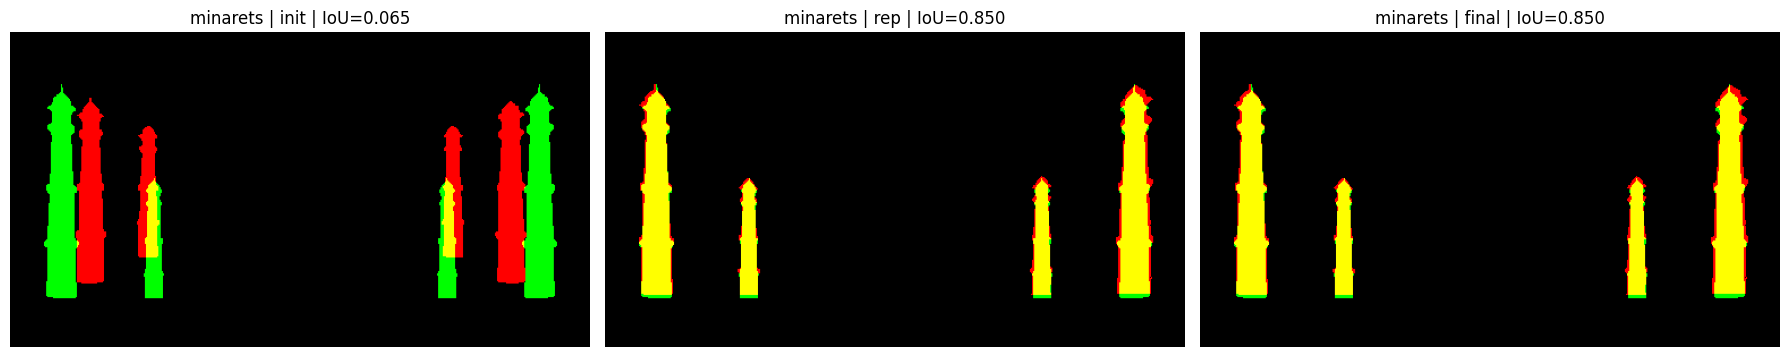


🏛️ Bibi
Mask resized: (861,1386) → (318,512) | scale=0.369


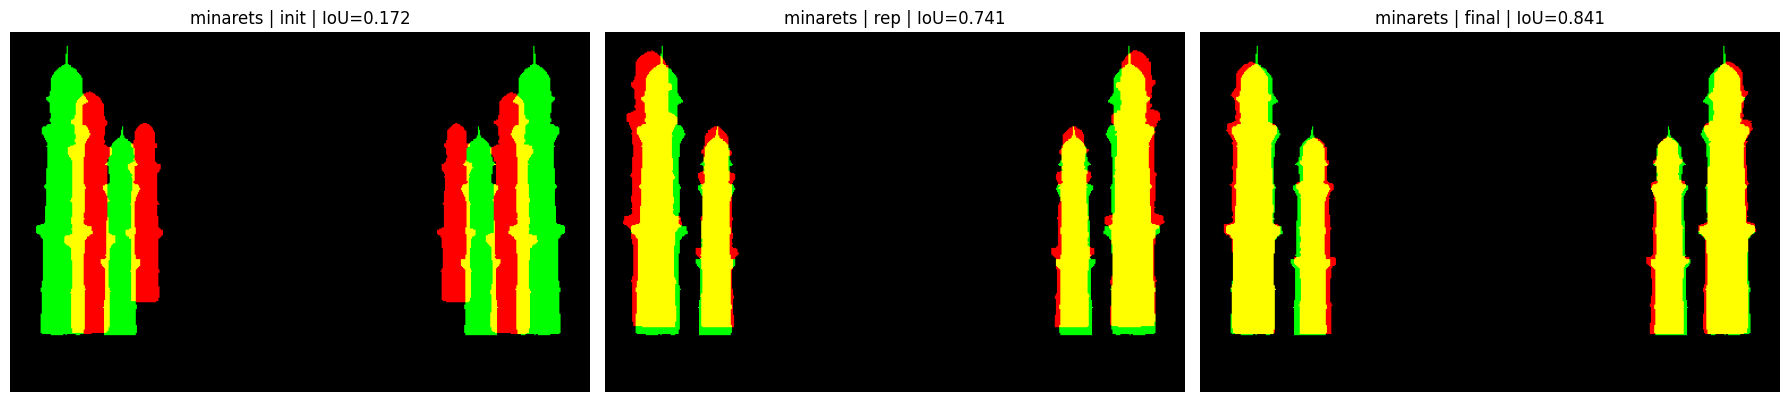


🏛️ Itimad
Mask resized: (1491,2374) → (322,512) | scale=0.216


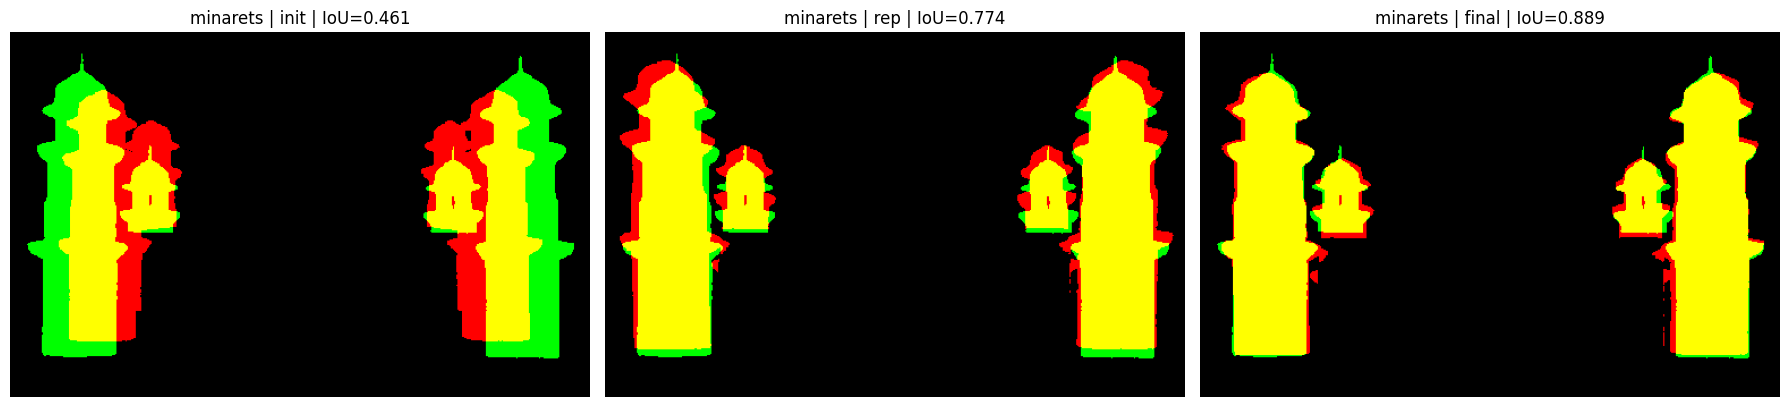


🏛️ Akbar
Mask resized: (693,718) → (124,128) | scale=0.178


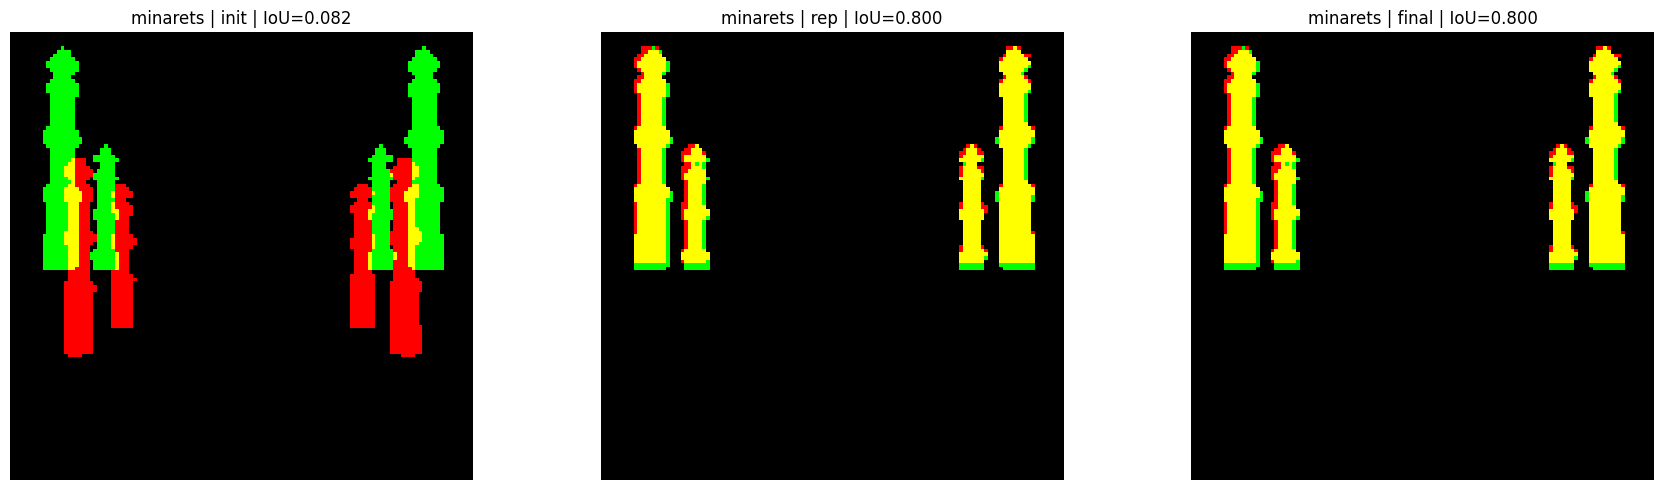


🏛️ Charminar
Mask resized: (1446,1004) → (512,355) | scale=0.354


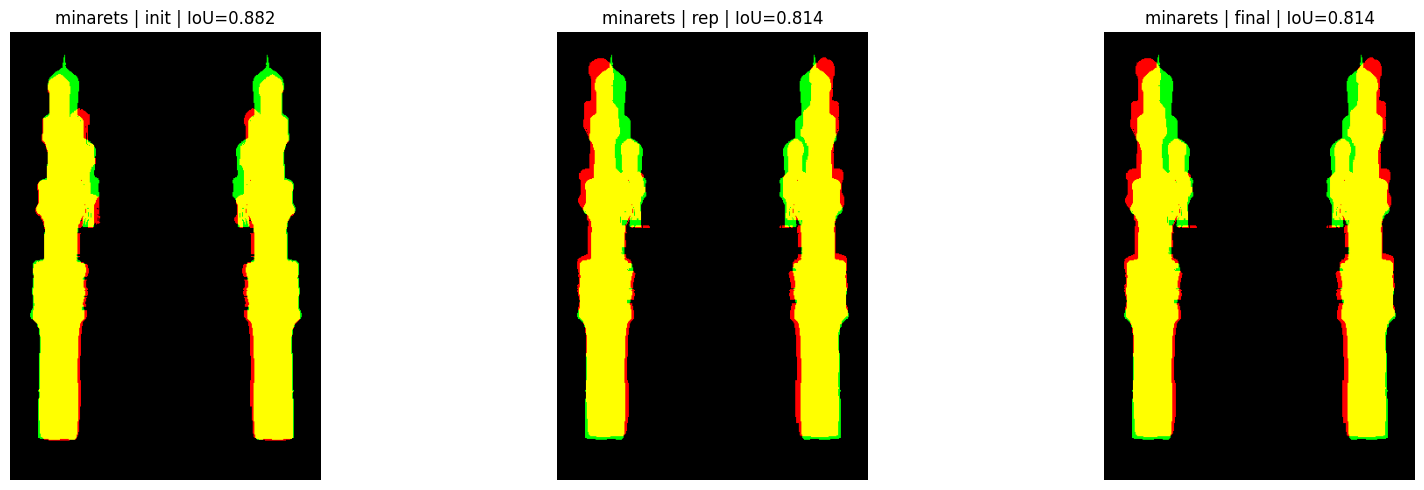


=== Minaret IoU (INIT voxel grid)
Visualization: ALL minarets together
Table: per-minaret IoU (visible only)
Cameras: Θinit → Θkp → Θfinal

+---------+-------------------+-------------------+-------------------+-------------------+-------------------+
|         | TM                | BkM               | IuD               | AT                | CM                |
+=========+===================+===================+===================+===================+===================+
| LM1     | 0.001→0.926→0.926 | 0.372→0.790→0.937 | 0.759→0.878→0.964 | 0.247→0.893→0.893 | 0.908→0.836→0.836 |
+---------+-------------------+-------------------+-------------------+-------------------+-------------------+
| RM1     | 0.001→0.884→0.884 | 0.307→0.826→0.946 | 0.817→0.886→0.982 | 0.175→0.970→0.970 | 0.928→0.935→0.935 |
+---------+-------------------+-------------------+-------------------+-------------------+-------------------+
| LM2     | 0.375→0.934→0.934 | 0.107→0.863→0.774 | 0.579→0.734→0.805 | 0.0

,TM,BkM,IuD,AT,CM
LM1,0.001→0.926→0.926,0.372→0.790→0.937,0.759→0.878→0.964,0.247→0.893→0.893,0.908→0.836→0.836
RM1,0.001→0.884→0.884,0.307→0.826→0.946,0.817→0.886→0.982,0.175→0.970→0.970,0.928→0.935→0.935
LM2,0.375→0.934→0.934,0.107→0.863→0.774,0.579→0.734→0.805,0.092→0.796→0.796,0.363→0.467→0.467
RM2,0.363→0.873→0.873,0.095→0.889→0.939,0.507→0.671→0.791,0.072→0.879→0.879,0.423→0.591→0.591
Average,0.185→0.904→0.904,0.220→0.842→0.899,0.665→0.792→0.885,0.146→0.885→0.885,0.655→0.707→0.707


In [6]:
run_minaret_iou_evaluation(
    monuments=["Taj", "Bibi", "Itimad", "Akbar", "Charminar"],
    view="front",
    root_voxels=root_voxels,
    root_masks=root_masks,
    cam_dir=cam_dir,
    part_colors=PART_COLORS,
    visualize=True,   # False = fast, True = plots
)


### All parts IoU


🏛️ Taj
Mask resized: (660,1214) → (278,512) | scale=0.422


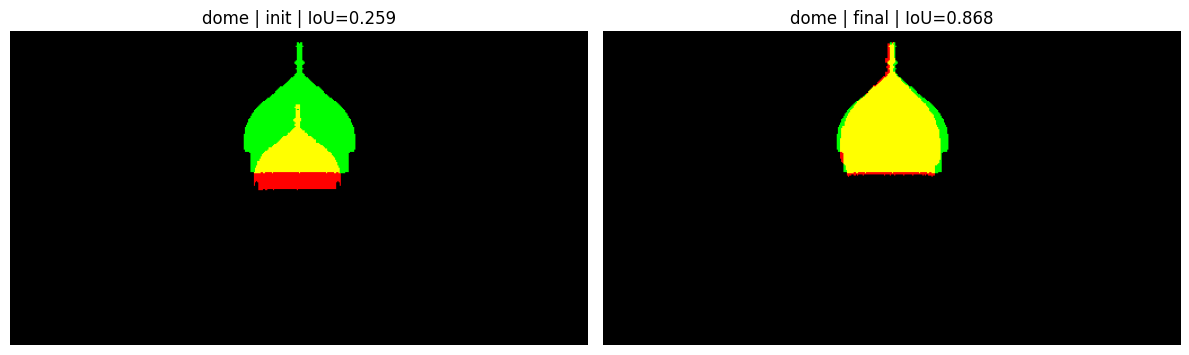

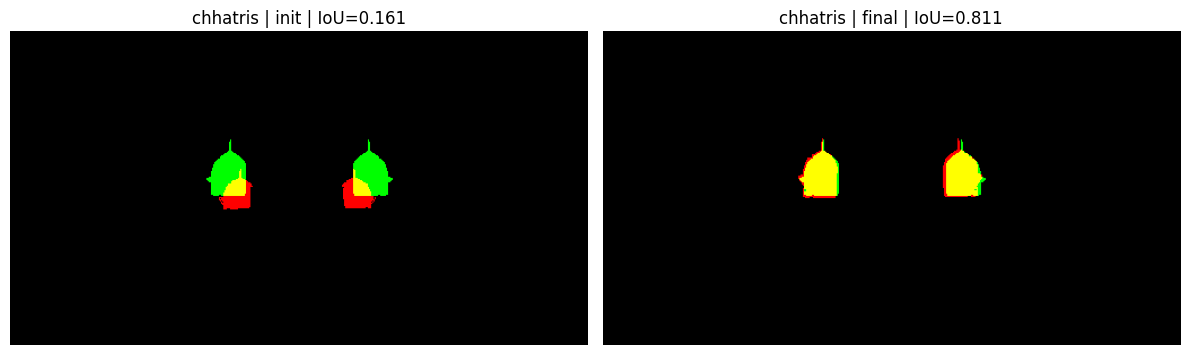

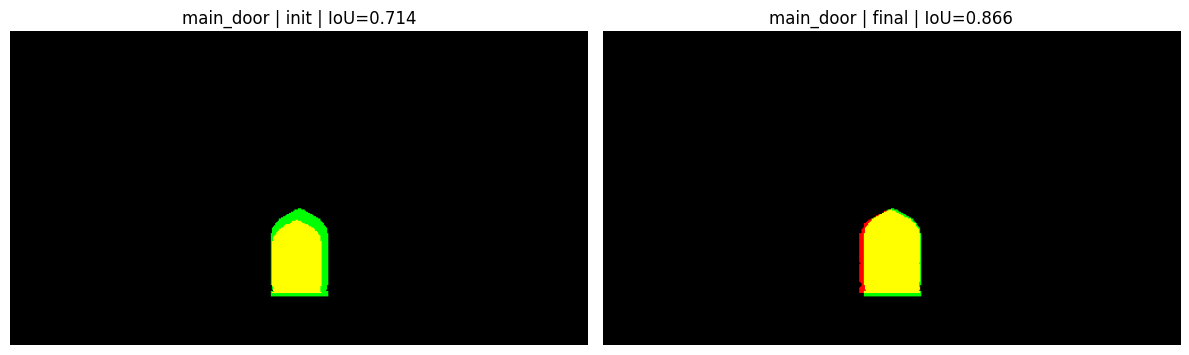

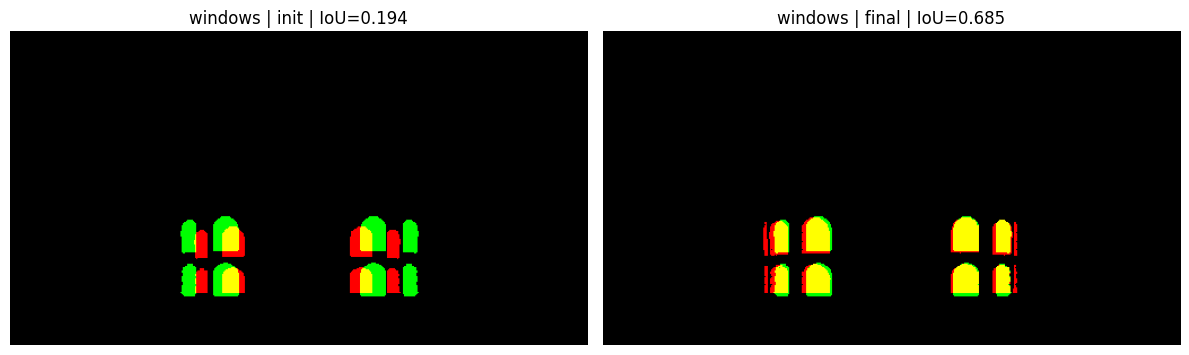

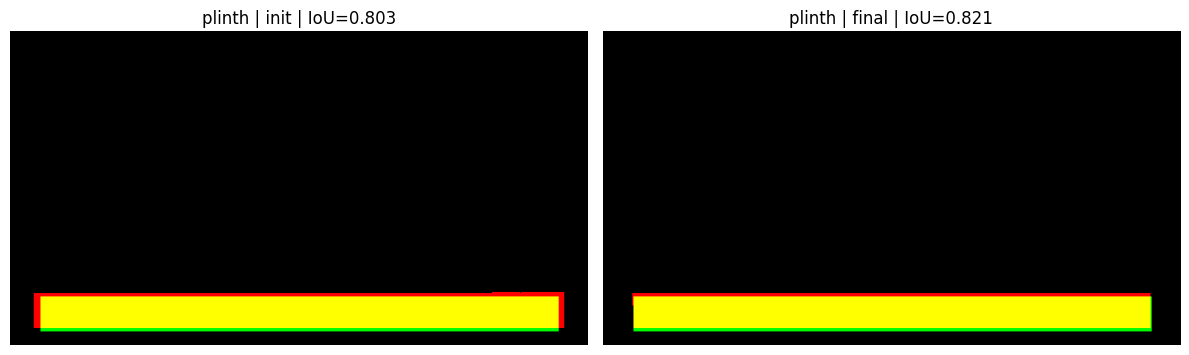

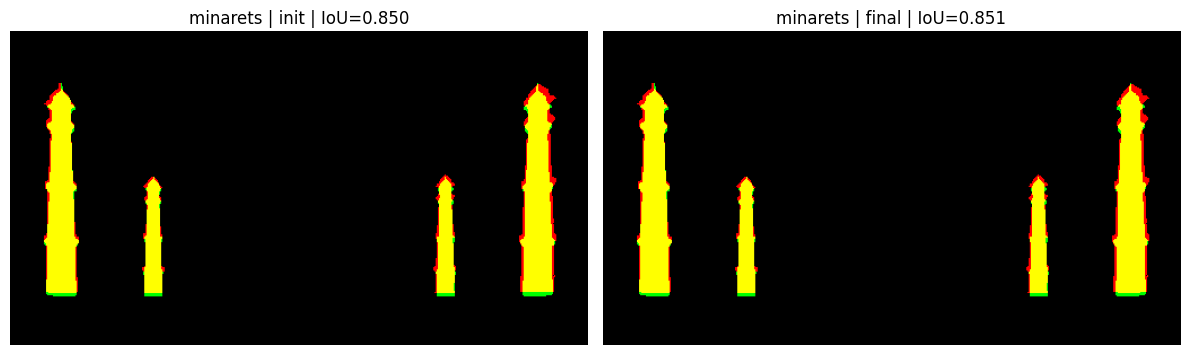

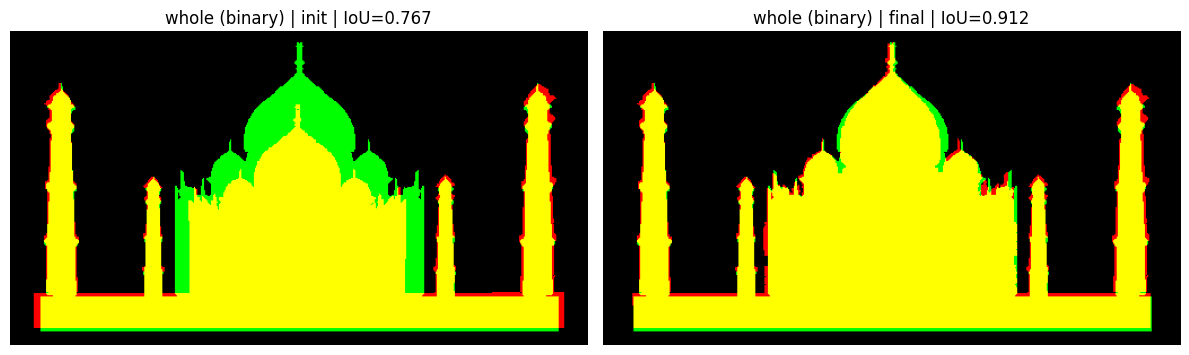


🏛️ Bibi
Mask resized: (861,1386) → (318,512) | scale=0.369


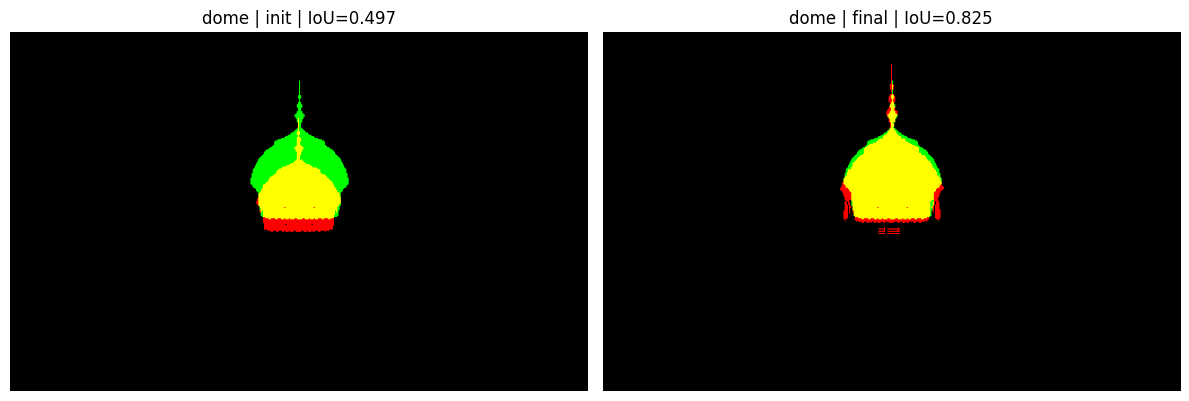

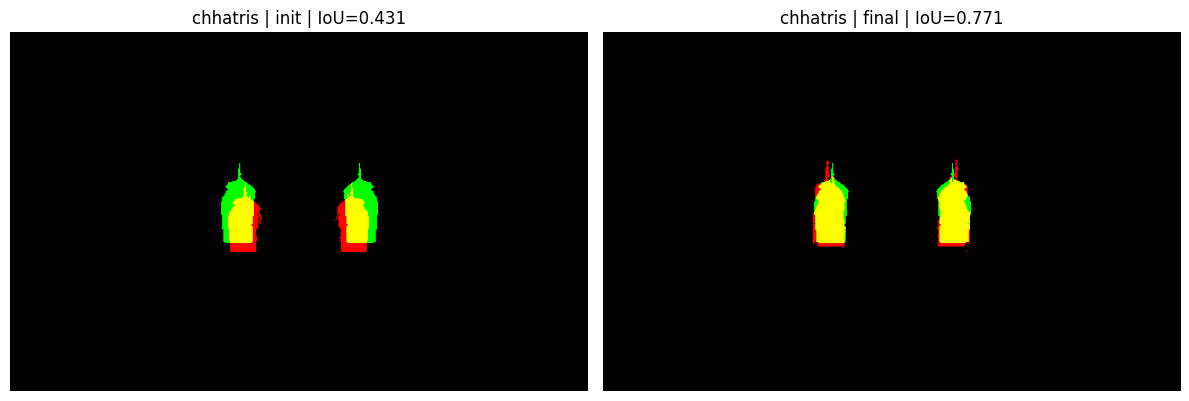

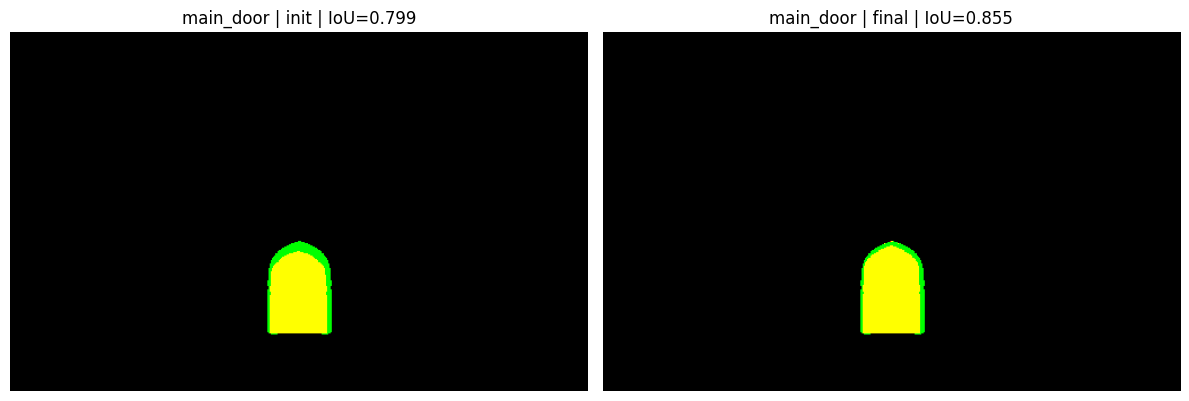

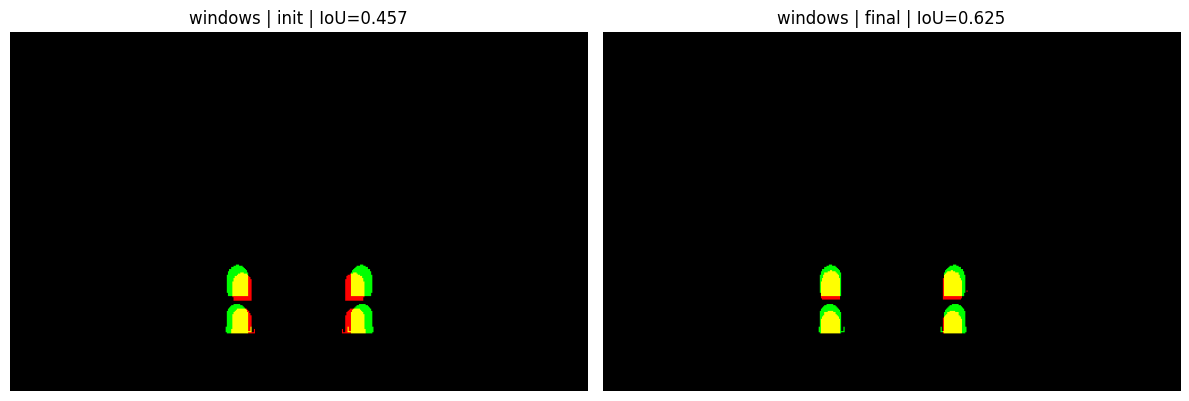

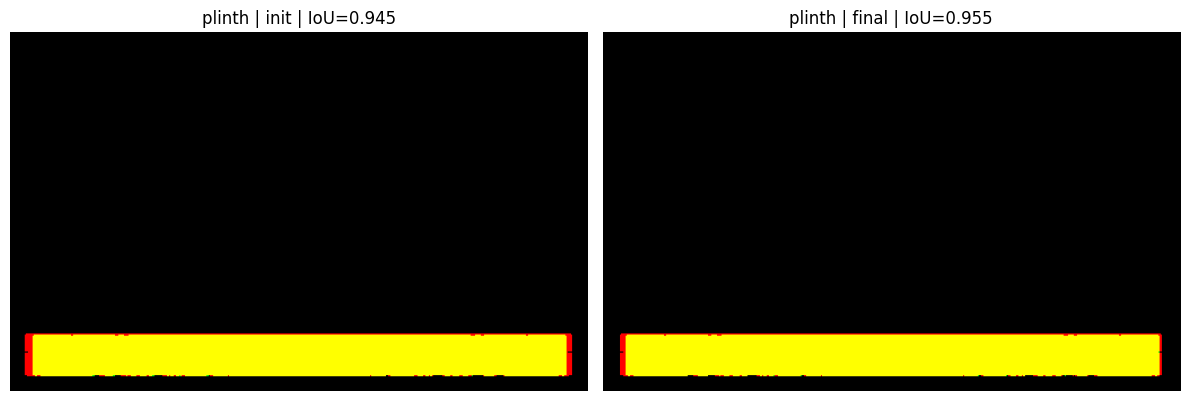

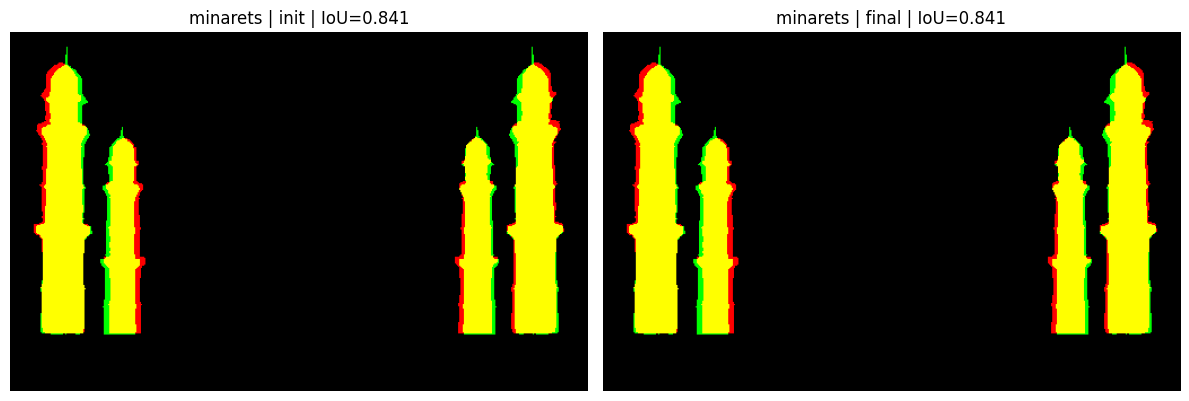

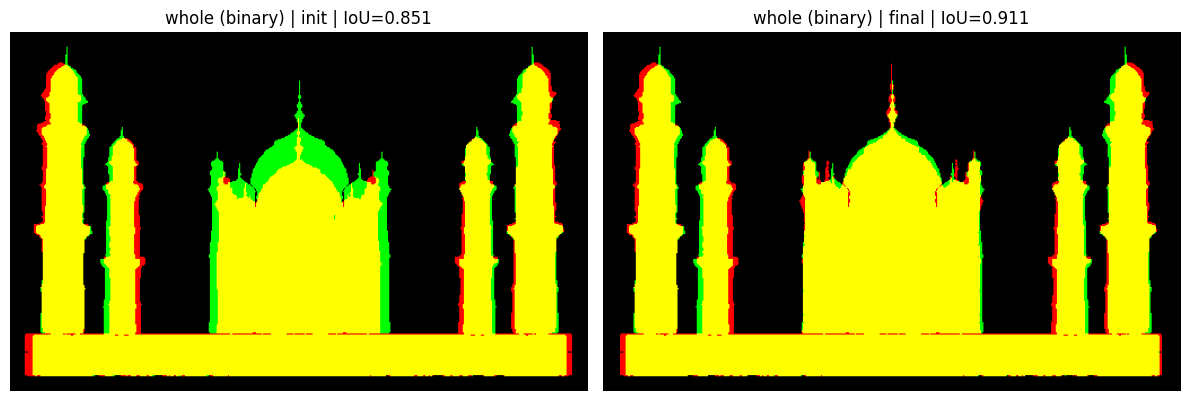


🏛️ Itimad
Mask resized: (1491,2374) → (322,512) | scale=0.216


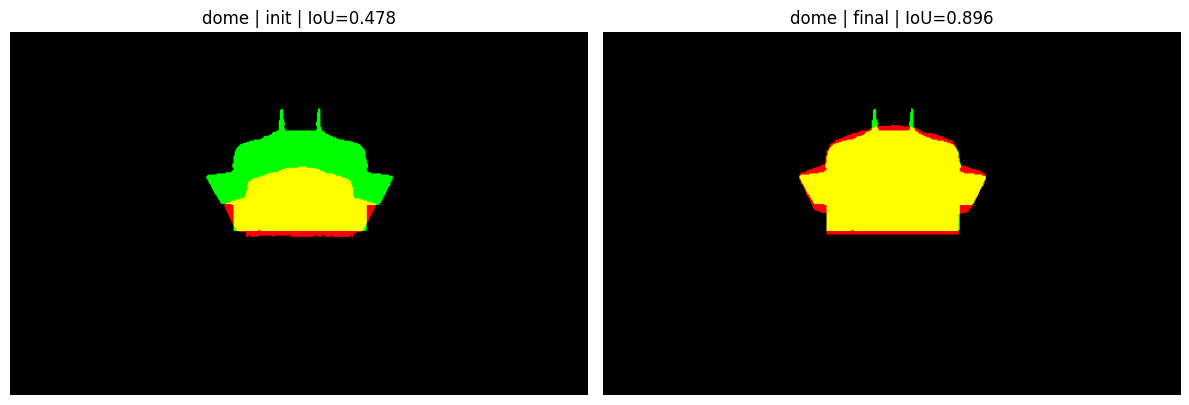

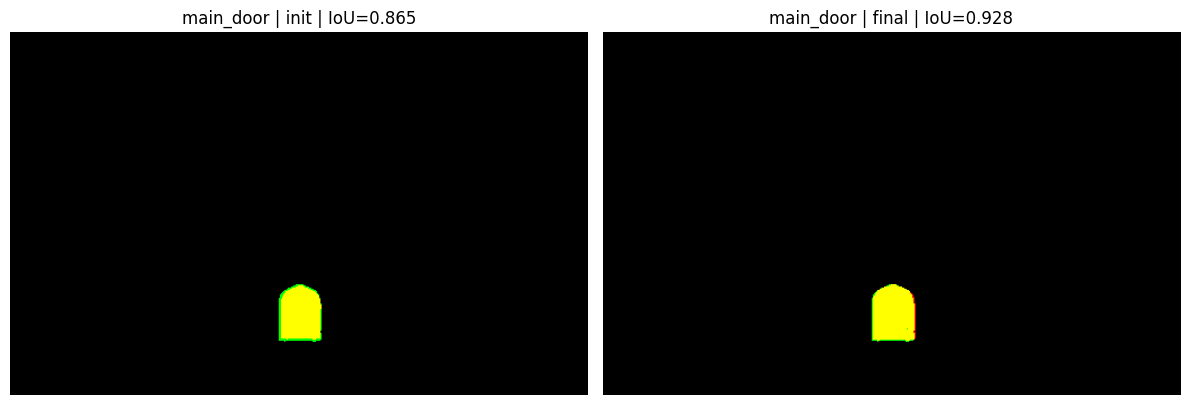

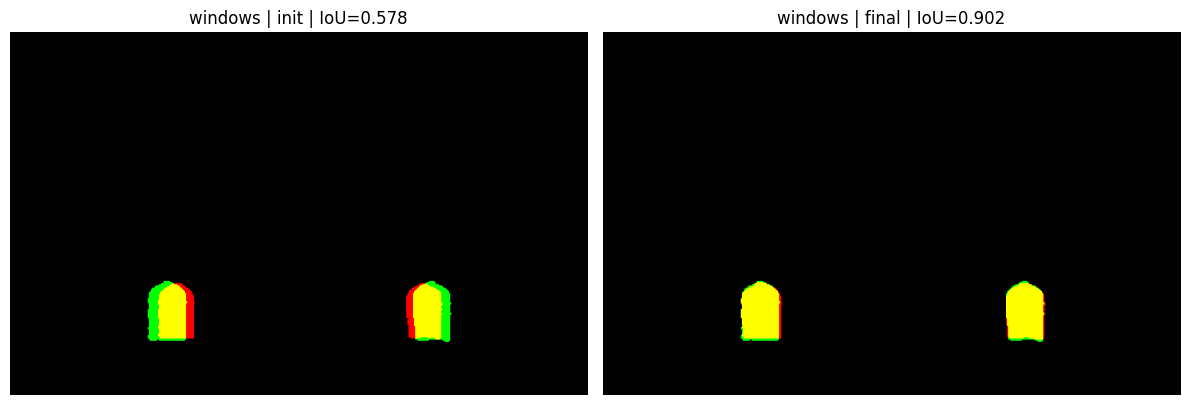

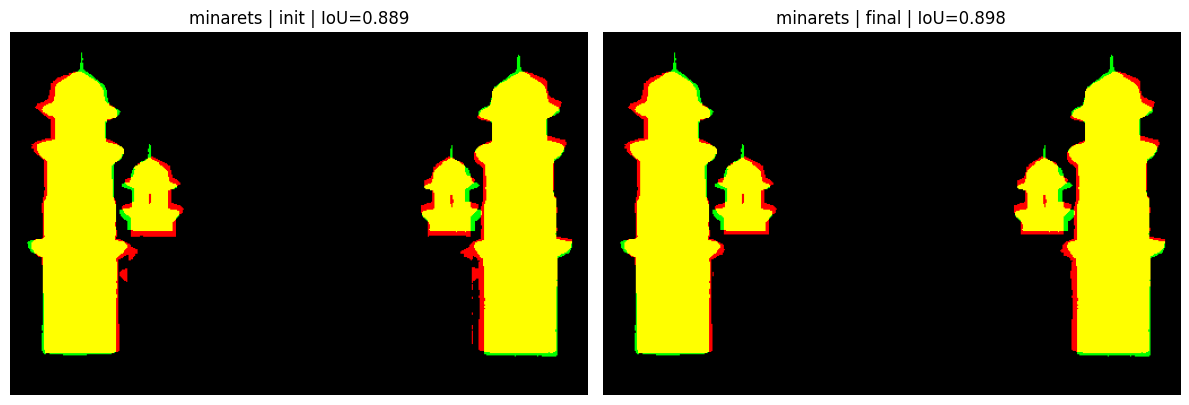

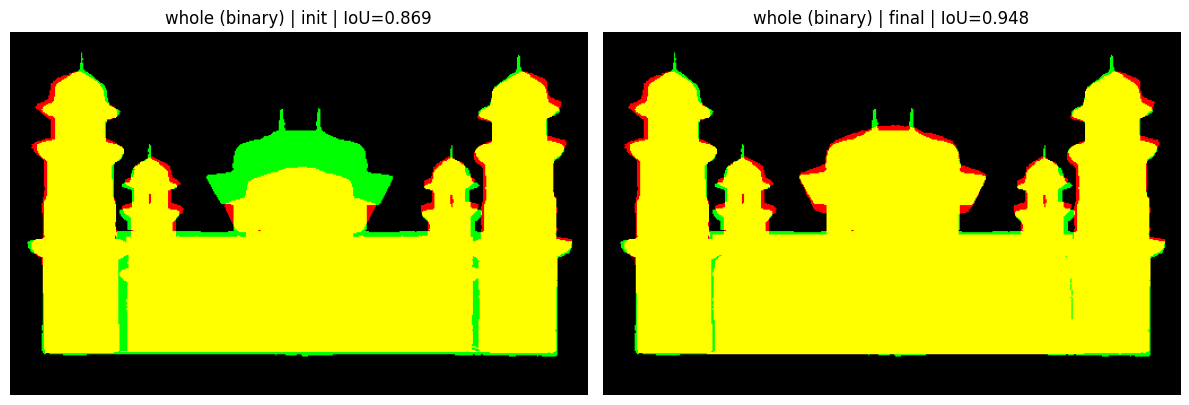


🏛️ Akbar
Mask resized: (693,718) → (124,128) | scale=0.178


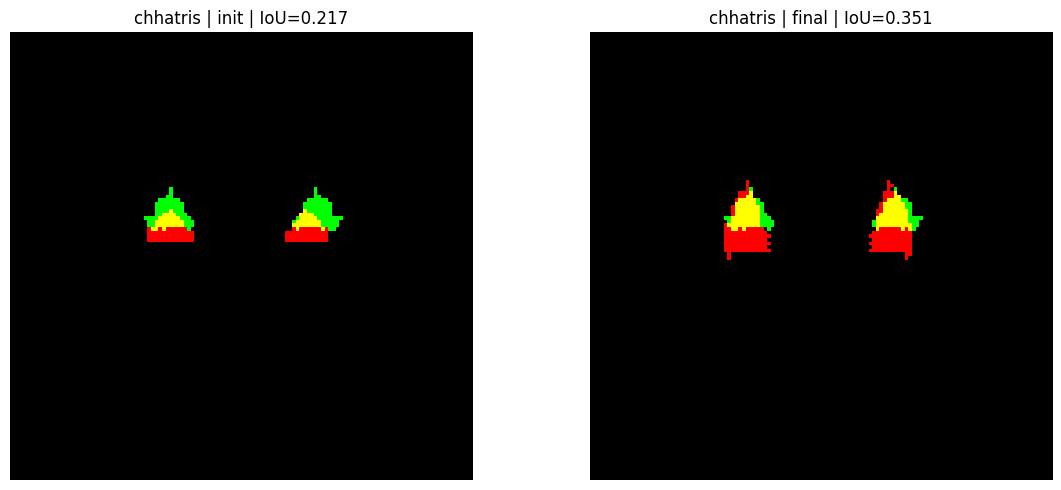

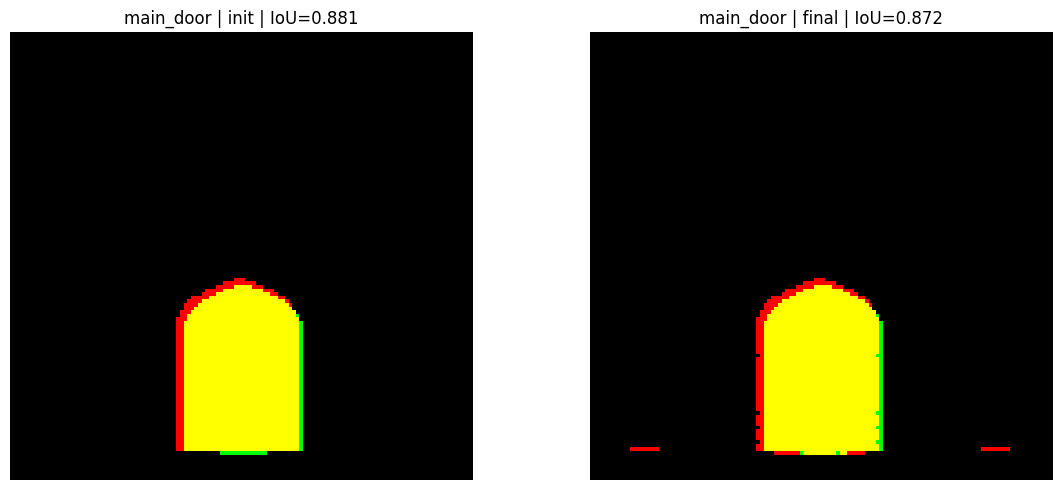

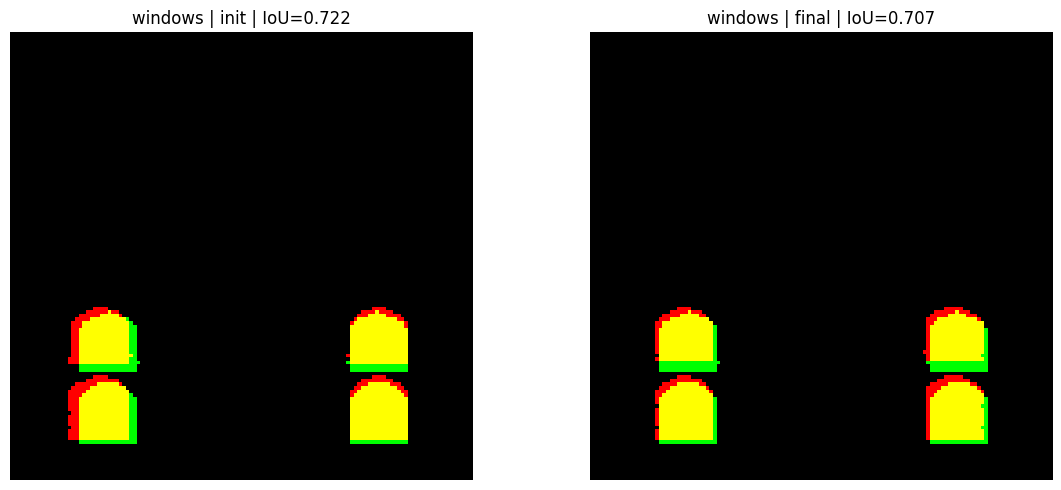

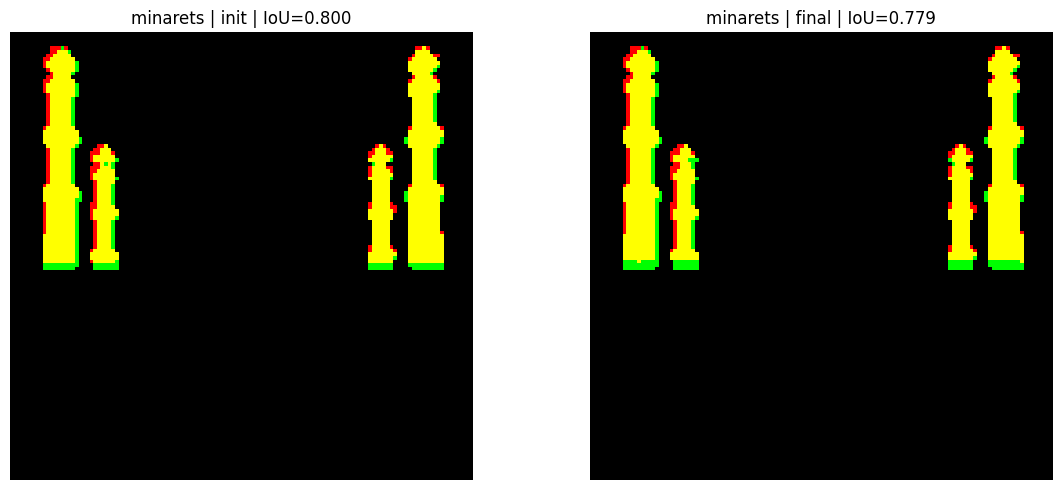

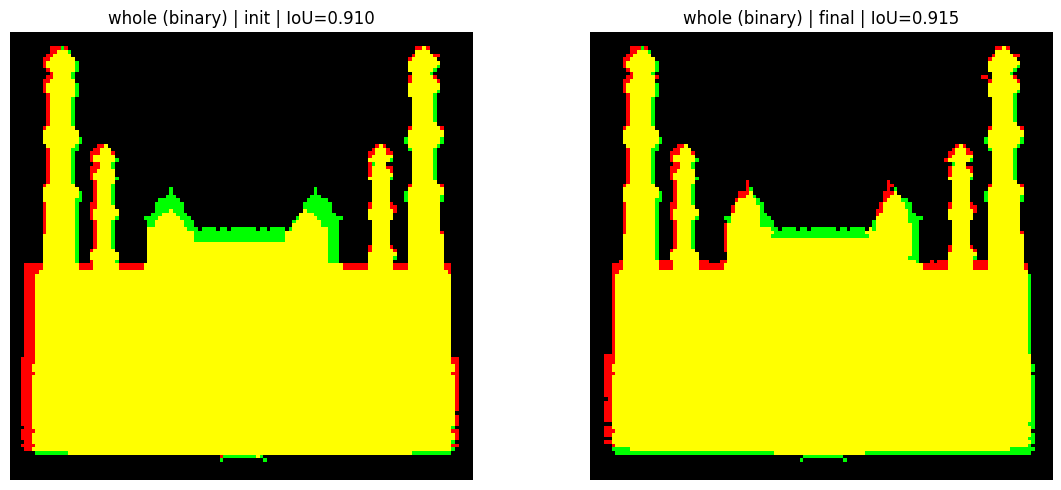


🏛️ Charminar
Mask resized: (1446,1004) → (512,355) | scale=0.354


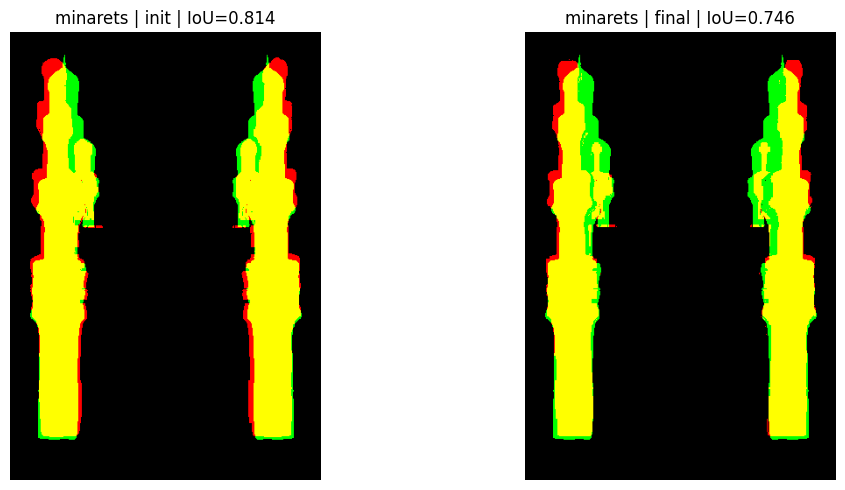

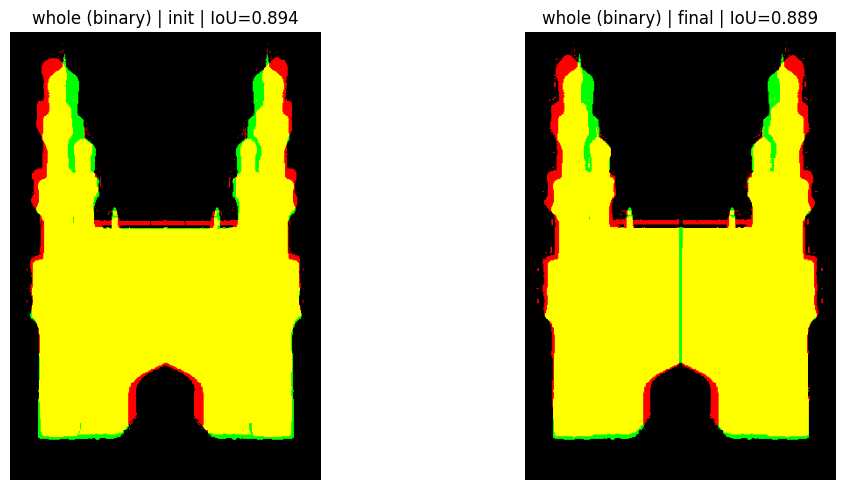


=== Part / Minaret / Binary IoU (init → deformed)
Camera: final (Θ*)
Visibility-aware

Binary row = true whole silhouette IoU
(not average of parts)

+-----------+-------------+-------------+-------------+-------------+-------------+
|           | TM          | BkM         | IuD         | AT          | CM          |
+===========+=============+=============+=============+=============+=============+
| dome      | 0.259→0.868 | 0.497→0.825 | 0.478→0.896 | --          | --          |
+-----------+-------------+-------------+-------------+-------------+-------------+
| chhatris  | 0.161→0.811 | 0.431→0.771 | --          | 0.217→0.351 | --          |
+-----------+-------------+-------------+-------------+-------------+-------------+
| main_door | 0.714→0.866 | 0.799→0.855 | 0.865→0.928 | 0.881→0.872 | --          |
+-----------+-------------+-------------+-------------+-------------+-------------+
| windows   | 0.194→0.685 | 0.457→0.625 | 0.578→0.902 | 0.722→0.707 | --          |
+--------

,TM,BkM,IuD,AT,CM
dome,0.259→0.868,0.497→0.825,0.478→0.896,--,--
chhatris,0.161→0.811,0.431→0.771,--,0.217→0.351,--
main_door,0.714→0.866,0.799→0.855,0.865→0.928,0.881→0.872,--
windows,0.194→0.685,0.457→0.625,0.578→0.902,0.722→0.707,--
plinth,0.803→0.821,0.945→0.955,--,--,--
minarets,0.850→0.851,0.841→0.841,0.889→0.898,0.800→0.779,0.814→0.746
whole,0.767→0.912,0.851→0.911,0.869→0.948,0.910→0.915,0.894→0.889


In [8]:
run_part_minaret_binary_iou(
    monuments=["Taj", "Bibi", "Itimad", "Akbar", "Charminar"],
    view="front",
    root_voxels=root_voxels,
    deformed_voxels=deformed_voxels,
    root_masks=root_masks,
    cam_dir=cam_dir,
    part_colors=PART_COLORS,
    visualize=True,   # False = fast eval
)
